<a href="https://colab.research.google.com/github/linusms/Hands-on/blob/main/chapter_5_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 .선형적으로 분리되는 데이터셋(iris 데이터셋의 setosa와 versicolor)에
# LinearSVC 훈련시켜보기

from sklearn import datasets

iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=iris['target']

setosa_or_versicolor=(y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]


In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

# 비용함수는 hinge 함수 사용(SVM에서 자주 쓰임)
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

# SVM은 훈련 전 반드시 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

# 각 모델의 절편과 파라미터들 출력
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


-0.9587007015533304 -0.2590911023446184 -1.0916699535467225 -0.3108091759144387 -1.0648436867566318 -0.16031402414292598
[-11.56182566  17.28382566] [ 6.03127548 -4.7506598 ]


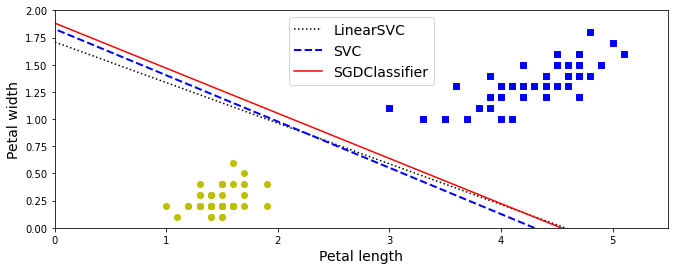

In [ ]:
import matplotlib.pyplot as plt

# 각 결정경계의 기울기와 편향을 계산합니다
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정경계를 원본 축척으로 변환합니다
# StandardScaler를 fit 할때 저장된 변환 계수들(평균, 분산 등)이 저장되어 있기 때문에 가능(?)
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정경계를 모두 그립니다
# 두 점의 x,y 좌표가 들어간 리스트만 넣어줘도 선이 그려짐
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [14]:
# 2. MNIST에 SVM 분류기 학습시켜보기

from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [15]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [16]:
# 좋지 않은 정확도. 일단 스케일링을 하지 않았기 때문.

from sklearn.metrics import accuracy_score

y_pred=lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [17]:
# 정규화 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [18]:
# 훈련 실행시간 13분

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [20]:
# 에러율이 절반으로 줄은 것을 확인 가능

y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

In [21]:
# LinearSVC가 아닌 SVC 클래스 사용해보기
# LinearSVC에 비해 시간 엄청 오래 걸리므로 10000개만

svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [22]:
# 6배나 적은 샘플수로 훈련했는데도 결과가 훨씬 좋다
# 실행시간 4분

y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

In [23]:
# 최적 파라미터 찾는 함수 RandomizedSearchCV
# GridSearchCV에 비해 조금 덜 최적인 값을 찾긴 하지만
# 시간 면에서 확실히 효율적이다. (n_iter로 반복 횟수 제한함)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.392994344474853, gamma=0.007688131124253573; total time=   0.4s
[CV] END ....C=5.392994344474853, gamma=0.007688131124253573; total time=   0.3s
[CV] END ....C=5.392994344474853, gamma=0.007688131124253573; total time=   0.4s
[CV] END ....C=10.904229623037404, gamma=0.06762346647096802; total time=   0.4s
[CV] END ....C=10.904229623037404, gamma=0.06762346647096802; total time=   0.4s
[CV] END ....C=10.904229623037404, gamma=0.06762346647096802; total time=   0.4s
[CV] END ....C=2.839167987229826, gamma=0.014959210253064799; total time=   0.4s
[CV] END ....C=2.839167987229826, gamma=0.014959210253064799; total time=   0.3s
[CV] END ....C=2.839167987229826, gamma=0.014959210253064799; total time=   0.4s
[CV] END ...C=5.196237507179794, gamma=0.0020044592655654265; total time=   0.3s
[CV] END ...C=5.196237507179794, gamma=0.0020044592655654265; total time=   0.3s
[CV] END ...C=5.196237507179794, gamma=0.0020044

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc8fa7a17f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc8fa79d550>},
                   verbose=2)

In [24]:
rnd_search_cv.best_estimator_

SVC(C=4.9199891549764, gamma=0.0016200662374377358)

In [25]:
# 1000개의 샘플(60분의 1...)만 사용해서 정확도가 낮게 나왔다
# 모든 샘플을 넣어 돌린다면 최적 파라미터일때 모델 정확도는 대락 0.99로 훌륭하게 나온다
# 다만 실행 시 몇 시간이 걸리므로 위와 같이 하는 방법만 알아두기

rnd_search_cv.best_score_

0.8609957262651874

In [26]:
# 3. 캘리포니아 주택 가격 데이터셋에 SVM 회귀 훈련

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [39]:
# 주의!! X_test_scaled는 X_train_scaled에서 변환때 쓴 계수로 변환해야 함
# 즉, fit()을 다시 쓰면 안됨(?)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
# 분류가 아니라 값 예측이므로 회귀 사용

from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [32]:
# RMSE가 0.98,(즉 데이터 숫자 단위(1)만큼 차이난다는 뜻) 
# 실제 데이터셋에서 단위는 10,000$이므로 대략 그만큼 차이난다고 생각 

from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.9819256687727764

In [34]:
# RandomizedSearchCV를 이용한 최적 파라미터 찾기 (실행시간 )

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  27.9s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  24.1s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  11.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  11.7s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  10.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   9.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  11.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc902385280>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc8fa805ee0>},
                   random_state=42, verbose=2)

In [35]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [36]:
# 오차(RMSE)가 꽤 많이 줄어든 것을 확인 가능

y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

In [40]:
# 테스트셋에서 성능 확인. 훈련 세트와 비슷한 오차로 준수한 결과를 볼 수 있음

y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874